# Linear Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model


%matplotlib inline

/Users/mojtabahaghighatlari/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
X = pd.read_csv('../data/molorg_features.csv',header = 0)
# remove constant columns (check previous notebook)
X = X.loc[:, (X != X.iloc[0]).any()]
print X.shape

(1000, 699)


In [3]:
y = pd.read_csv('../data/molorg_pol.csv', header = 0)
print y.shape

(1000, 1)


## pairwise correlation of columns

In [4]:
Xy = pd.concat([X,y], axis = 1)
print Xy.shape

Xy_corr = Xy.corr(method='pearson')
print Xy_corr.shape

(1000, 700)
(700, 700)


In [5]:
Xy_corr[y.columns[0]].sort_values(ascending=False).head(n = 10)

pol_Bohr3     1.000000
SpPos_B(p)    0.963040
Wi_B(p)       0.962894
HyWi_B(p)     0.957987
Ho_B(m)       0.953821
SpPos_B(v)    0.953416
Wi_B(v)       0.953205
SpAbs_B(m)    0.952317
Ho_B(p)       0.951189
SM1_B(p)      0.951043
Name: pol_Bohr3, dtype: float64

In [6]:
Xy_corr[y.columns[0]].sort_values(ascending=False).tail(n = 10)

WiA_B(e)    -0.875921
GD          -0.891986
SpMaxA_X    -0.894276
SpMaxA_A    -0.895247
WiA_H2      -0.895354
SpMaxA_L    -0.896842
SpMaxA_H2   -0.897110
Xt          -0.898552
VE2_L       -0.908247
VE2sign_L   -0.908247
Name: pol_Bohr3, dtype: float64

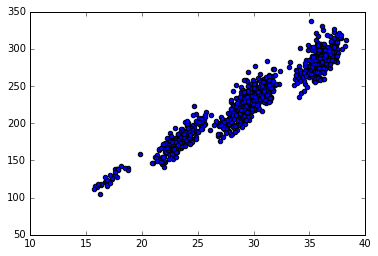

In [7]:
# 2D matrix-based descriptor weighted by polarizability
plt.scatter(X['SpPos_B(p)'], y.values)

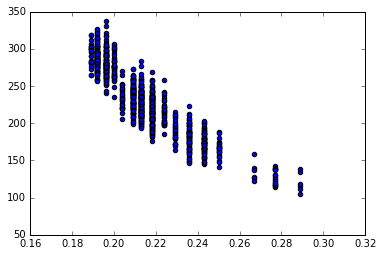

In [8]:
# 2D matrix-based descriptor from Laplace matrix
plt.scatter(X['VE2sign_L'], y.values)

0.204818831914


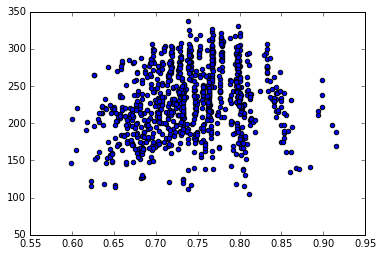

In [9]:
# Mean atomic polarizability
plt.scatter(X['Mp'], y.values)
print Xy_corr.loc[y.columns[0], 'Mp']

## Ordinary Linear Regression

In [11]:
x1 = X['SpPos_B(p)'].values.reshape(-1,1)
# print x1.shape
y1 = y.values.reshape(-1,1)
# print y1.shape

In [13]:
lr1 = linear_model.LinearRegression()
lr1.fit(x1, y1)
print 'training R2: ', lr1.score(x1,y1)

training R2:  0.927446118164


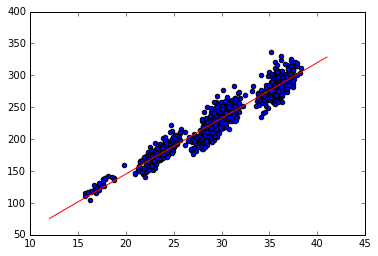

In [14]:
xtest = np.transpose(np.reshape(range(12,42),[1,30]))
ytest = lr1.predict(xtest)
plt.scatter(x1,y1)
plt.plot(xtest,ytest, color="red")

## Robust regression and outliers

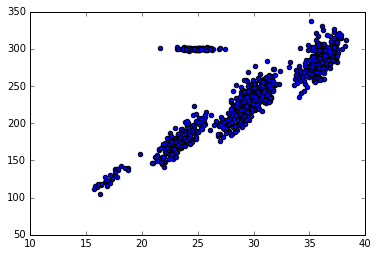

In [15]:
x_outlier = np.random.randn(100,1) + 25
y_outlier = np.random.randn(100,1) + 300
x1 = np.concatenate((x1,x_outlier), axis=0)
y1 = np.concatenate((y1,y_outlier), axis=0)
plt.scatter(x1,y1)

In [16]:
lr2 = linear_model.LinearRegression()
lr2.fit(x1, y1)
print 'training R2: ', lr2.score(x1,y1)

training R2:  0.516161857798


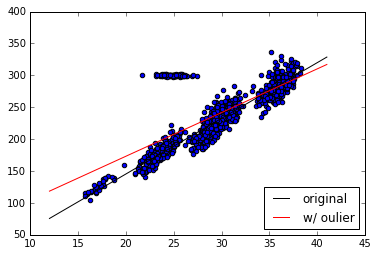

In [17]:
xtest = np.transpose(np.reshape(range(12,42),[1,30]))
ytest1 = lr1.predict(xtest)
ytest2 = lr2.predict(xtest)
plt.scatter(x1,y1)
plt.plot(xtest,ytest1, color="black", label='original')
plt.plot(xtest,ytest2, color="red", label='w/ oulier')
plt.legend(loc='lower right')

In [18]:
ransac = linear_model.RANSACRegressor()
ransac.fit(x1,y1)
print 'training R2: ', ransac.score(x1,y1)

training R2:  0.428706490253


In [19]:
ridge = linear_model.Ridge()
ridge.fit(x1,y1)
print 'training R2: ', ridge.score(x1,y1)

training R2:  0.516161857105


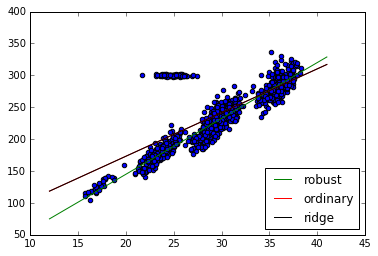

In [20]:
xtest = np.transpose(np.reshape(range(12,42),[1,30]))
ytest = ransac.predict(xtest)
ytest2 = lr2.predict(xtest)
ytest3 = ridge.predict(xtest)

plt.scatter(x1,y1)
plt.plot(xtest,ytest, color="green", label='robust')
plt.plot(xtest,ytest2, color="red", label='ordinary')
plt.plot(xtest,ytest3, color="k", label='ridge')

plt.legend(loc='lower right')

## Multivariate Regression

In [21]:
# ransac = linear_model.RANSACRegressor()
# ransac.fit(X.values,y.values.reshape(-1,1))
# print 'training R2: ', ransac.score(X.values,y.values.reshape(-1,1))

## Ridge regression: avoid overfitting

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [23]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30

x2 = np.sort(np.random.rand(n_samples))
y2 = true_fun(x2) + np.random.randn(n_samples) * 0.1

# plt.scatter(x2, y2)

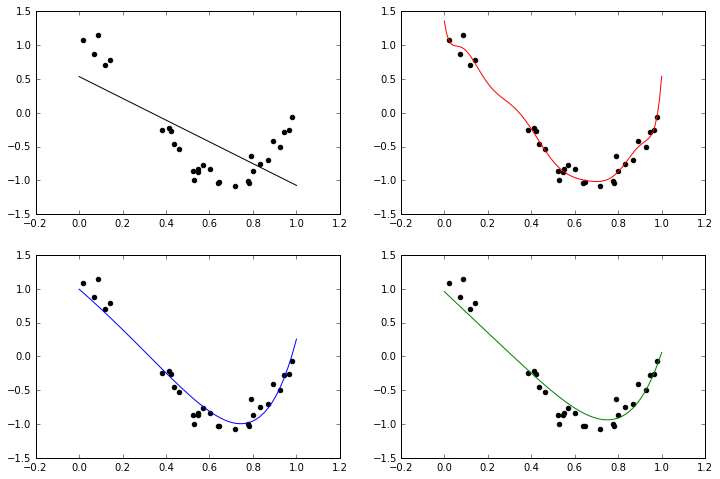

In [27]:
x2 = x2.reshape(-1,1)
y2 = y2.reshape(-1,1)
lrmodel = linear_model.LinearRegression()
lrmodel.fit(x2,y2)

polynomial_features = PolynomialFeatures(degree=10,include_bias=False)
lrmodel1 = linear_model.LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", lrmodel1)])
pipeline.fit(x2,y2)
# fit ridge regression model on expanded features
ridge = linear_model.Ridge(alpha=.1)
pipeline1 = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge)])
pipeline1.fit(x2,y2)

lasso = linear_model.Lasso(alpha=0.01)
pipeline2 = Pipeline([("polynomial_features", polynomial_features),
                     ("lasso_regression", lasso)])
pipeline2.fit(x2,y2)

# plot the fitted lines
X_all = np.linspace(0, 1, 100)
fig = plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
plt.plot(X_all, lrmodel.predict(X_all[:, np.newaxis]),color='k',label='')
plt.scatter(x2,y2, c='k', label='data')
plt.subplot(2,2,2)
plt.plot(X_all, pipeline.predict(X_all[:, np.newaxis]),color='r')
plt.scatter(x2,y2, c='k', label='data')
plt.subplot(2,2,3)
plt.plot(X_all, pipeline1.predict(X_all[:, np.newaxis]),color='b')
plt.scatter(x2,y2, c='k', label='data')
plt.subplot(2,2,4)
plt.plot(X_all, pipeline2.predict(X_all[:, np.newaxis]),color='g')
plt.scatter(x2,y2, c='k', label='data')


## Ridge and Lasso Regression: robust to collinearity

In [28]:
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, intercept, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(1,1+len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return "%6.3f"%intercept+" + " +" + ".join("%6.3f * %s" % (coef, name)
                                   for coef, name in lst)

In [29]:
Xy_corr[y.columns[0]].sort_values(ascending=False).head(n = 10)

pol_Bohr3     1.000000
SpPos_B(p)    0.963040
Wi_B(p)       0.962894
HyWi_B(p)     0.957987
Ho_B(m)       0.953821
SpPos_B(v)    0.953416
Wi_B(v)       0.953205
SpAbs_B(m)    0.952317
Ho_B(p)       0.951189
SM1_B(p)      0.951043
Name: pol_Bohr3, dtype: float64

In [30]:
x = X[['SpPos_B(p)','Wi_B(p)','HyWi_B(p)']]
print x.shape
pol = y.values.reshape(-1,1)
print pol.shape
lr = linear_model.LinearRegression()
lr.fit(x,pol)
print "Linear model:", lr.intercept_, '+', lr.coef_[0]

ridge = linear_model.Ridge(alpha=10)
ridge.fit(x,pol)
print "Ridge model:", ridge.intercept_, '+', ridge.coef_[0]


lasso = linear_model.Lasso(alpha=1)
lasso.fit(x,pol)
print "Lasso model:", lasso.intercept_, '+', lasso.coef_




(1000, 3)
(1000, 1)
Linear model: [-151.07215811] + [  2.51213938   2.54870039  44.31408169]
Ridge model: [-29.92006984] + [ 4.2954271   2.42034871  2.27264168]
Ridge model: [-16.53759081] + [ 0.         4.8383508  0.       ]
